In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras import regularizers

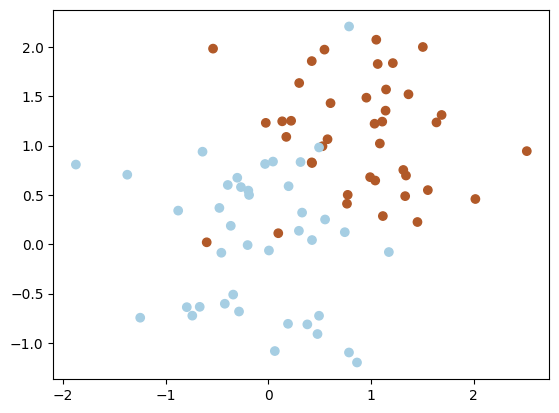

In [2]:
centers = ([0, 0], [1, 1])
X_train, y_train = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
X_test, y_test = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
# Plotting
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

In [3]:
regularized_nn = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),
    layers.Dense(units=10, activation="relu",
                    kernel_regularizer=regularizers.L2(l2=1e-4),
                    activity_regularizer=regularizers.L2(1e-5),
                    bias_regularizer=regularizers.L2(1e-4)
                ),
    layers.Dropout(.2),
    layers.Dense(units=10, activation="relu",
                    kernel_regularizer=regularizers.L2(l2=1e-4),
                    activity_regularizer=regularizers.L2(1e-5),
                    bias_regularizer=regularizers.L2(1e-4)
                ),
    layers.Dense(units=1, activation="sigmoid", name="output")])

In [4]:
regularized_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [5]:
regularized_nn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
                                  loss= tf.keras.losses.binary_crossentropy, 
                                  metrics=['accuracy'])

In [6]:
history = regularized_nn.fit(X_train, y_train, epochs=200, verbose=2)

Epoch 1/200
3/3 - 1s - loss: 0.7099 - accuracy: 0.3875 - 1s/epoch - 406ms/step
Epoch 2/200
3/3 - 0s - loss: 0.6702 - accuracy: 0.6875 - 13ms/epoch - 4ms/step
Epoch 3/200
3/3 - 0s - loss: 0.6419 - accuracy: 0.6500 - 14ms/epoch - 5ms/step
Epoch 4/200
3/3 - 0s - loss: 0.6140 - accuracy: 0.6500 - 13ms/epoch - 4ms/step
Epoch 5/200
3/3 - 0s - loss: 0.6250 - accuracy: 0.6750 - 12ms/epoch - 4ms/step
Epoch 6/200
3/3 - 0s - loss: 0.5819 - accuracy: 0.7000 - 13ms/epoch - 4ms/step
Epoch 7/200
3/3 - 0s - loss: 0.5897 - accuracy: 0.7375 - 12ms/epoch - 4ms/step
Epoch 8/200
3/3 - 0s - loss: 0.5737 - accuracy: 0.7500 - 13ms/epoch - 4ms/step
Epoch 9/200
3/3 - 0s - loss: 0.5567 - accuracy: 0.7750 - 13ms/epoch - 4ms/step
Epoch 10/200
3/3 - 0s - loss: 0.5574 - accuracy: 0.7750 - 11ms/epoch - 4ms/step
Epoch 11/200
3/3 - 0s - loss: 0.5467 - accuracy: 0.8000 - 12ms/epoch - 4ms/step
Epoch 12/200
3/3 - 0s - loss: 0.5129 - accuracy: 0.8125 - 11ms/epoch - 4ms/step
Epoch 13/200
3/3 - 0s - loss: 0.5308 - accuracy: 

9600/9600 [==============================] - 15s 2ms/step


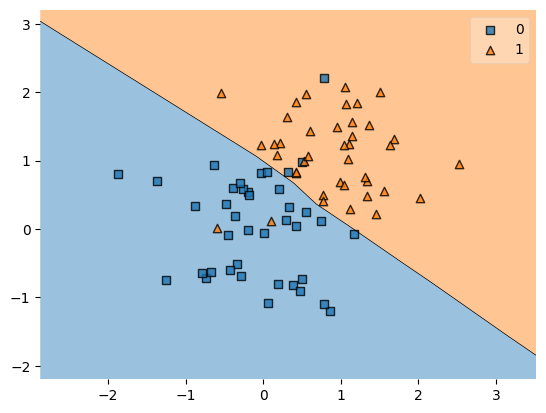

In [7]:
plot_decision_regions(X_train, y_train, clf=regularized_nn)
plt.show()

In [8]:
regularized_nn.evaluate(X_train, y_train)

3/3 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9375


[0.24774055182933807, 0.9375]

In [9]:
regularized_nn.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.8000


[0.4392459988594055, 0.800000011920929]